# Simple linear and nonlinear regression using feedforward neural network

# Importing packages

In [189]:
# installation in Google Colab's Jupyter notebook:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [320]:
# importing packages (libraries):
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Defining the network

In [217]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [339]:
# defining the structure of neural network:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(1, 10)
        self.layer2 = nn.Linear(10, 20)
        self.layer3 = nn.Linear(20, 10)
        self.layer4 = nn.Linear(10, 1)
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
        self.relu3 = nn.ReLU()

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.relu3(self.layer3(x))
        x = self.layer4(x)
        return x

In [340]:
# instantiate the class of neural network:
net = NeuralNetwork()
print(net)

NeuralNetwork(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=10, bias=True)
  (layer4): Linear(in_features=10, out_features=1, bias=True)
  (relu1): ReLU()
  (relu2): ReLU()
  (relu3): ReLU()
)


# Optimizer

In [341]:
# define optimizer:
optimizer = 'Adam'
if optimizer == 'SGD':
    optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
elif optimizer == 'Adam':
    optimizer = torch.optim.Adam(net.parameters(), lr=0.02)

# define the loss function:
loss_func = torch.nn.MSELoss()

# Data loader

In [342]:
class Data(Dataset):
    def __init__(self, x, y):
        self.data = torch.from_numpy(x.reshape(-1,1)).float()
        self.label = torch.from_numpy(y.reshape(-1,1)).float()

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, item):
        data_point = self.data[item]
        label_point = self.label[item]
        return data_point, label_point

In [343]:
batch_size = 16
def load_dataset(x_train, y_train, x_test, y_test):    
    # data loader for training data:
    train_ds = Data(x_train, y_train)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    # data loader for test data:
    test_ds = Data(x_test, y_test)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

# Dataset

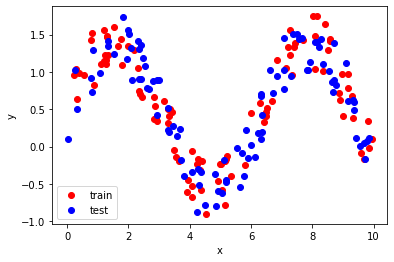

In [344]:
dataset_type = 'nonlinear'

if dataset_type == 'linear':
    # almost linear dataset:
    x_train = np.random.rand(100)
    y_train = np.sin(x_train) * (x_train**3) + 3*x_train + np.random.rand(100)*0.8
    x_test = np.random.rand(100)
    y_test = np.sin(x_test) * (x_test**3) + 3*x_test + np.random.rand(100)*0.8
elif dataset_type == 'nonlinear':
    # dataset:
    x_train = np.random.rand(100) * 10
    y_train = np.sin(x_train) + np.random.rand(100)*0.8
    x_test = np.random.rand(100) * 10
    y_test = np.sin(x_test) + np.random.rand(100)*0.8

# reshape to have samples in rows:
x_train = x_train.reshape((-1, 1))
x_test = x_test.reshape((-1, 1))

# visualize data:
plt.scatter(x_train, y_train, c='r', label='train')
plt.scatter(x_test, y_test, c='b', label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Training neural network

In [345]:
# load dataset:
train_loader, test_loader = load_dataset(x_train, y_train, x_test, y_test)

In [346]:
n_epochs = 1000
loss_list = []
for epoch in tqdm(range(n_epochs), desc='epochs'):
    loss_list_in_epoch = []
    for step, (data_batch, label_batch) in enumerate(train_loader):
        data_batch, label_batch = data_batch.to(device), label_batch.to(device)
        prediction = net(data_batch)
        loss = loss_func(prediction, label_batch) 
        loss_list_in_epoch.append(loss.cpu().detach().item())
        optimizer.zero_grad()
        loss.backward()        
        optimizer.step()
    loss_list.append(np.mean(loss_list_in_epoch))

epochs: 100%|██████████| 1000/1000 [00:12<00:00, 81.84it/s]


# Test (evaluation) phase

In [347]:
prediction_list = []
with torch.no_grad():
    for step, (data_batch, label_batch) in enumerate(test_loader):
        prediction = net(data_batch)
        prediction_list.extend(prediction)

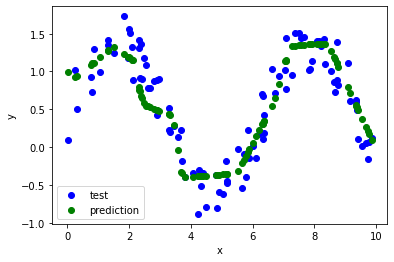

In [350]:
# visualize the predicted and actual data:
plt.scatter(x_test, y_test, c='b', label='test')
plt.scatter(x_test, prediction_list, c='g', label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()